<a href="https://colab.research.google.com/github/Usama3059/StudentAdmiision/blob/master/Student_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
data = pd.read_csv('student_data.csv')
data.head()


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


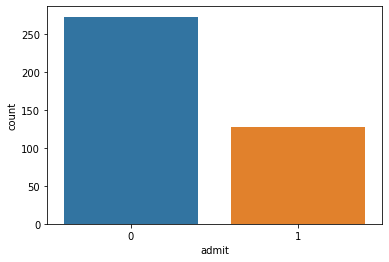

In [53]:
import seaborn as sns
sns.countplot(x=data.admit,data=data)

In [62]:
import numpy as np

y=data.admit.values
X_data =data.drop(['admit'] , axis =1)
X_data.head()

x = X_data-np.min(X_data)/np.max(X_data)-np.min(X_data)
x


,gre,gpa,rank
0,159.725,0.785,1.75
1,439.725,0.845,1.75
2,579.725,1.175,-0.25
3,419.725,0.365,2.75
4,299.725,0.105,2.75
...,...,...,...
395,399.725,1.175,0.75
396,339.725,0.215,1.75
397,239.725,-0.195,0.75
398,479.725,0.825,0.75


In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_data,y,test_size=0.2,random_state=0 )


**RANDOMFOREST**

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators = 1000 )
rf.fit(X_train,Y_train)
acc= rf.score(X_test,Y_test)*100

print("Accuracy from Randomforest ",acc)

Accuracy from Randomforest  65.0


In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
acc = lr.score(X_test,Y_test)*100

print("Test Accuracy  " ,acc)

Test Accuracy   68.75


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
# Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]


,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [51]:
# Copying our data
processed_data = one_hot_data[:]

# Scaling the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0
